# <font color='blue'>Deep Learning II</font>

# Recurrent Neural Networks

Redes Neurais Recorrentes ou RNNs são um tipo especial de rede neural projetada para problemas sequenciais. Considerando uma rede padrão Multilayer Perceptron, uma rede neural recorrente pode ser pensada como a adição de loops à arquitetura. Por exemplo, em uma dada camada, cada neurônio pode passar seu sinal para frente (feed-forward) e também para o lado. 

Uma Rede Neural Recorrente é basicamente uma rede neural que pode ser usada quando seus dados são tratados como uma sequência, onde a ordem particular dos pontos de dados é importante e esta sequência pode ser de comprimento arbitrário.

O exemplo mais claro é talvez uma série temporal de números, onde a tarefa é prever o próximo valor de acordo com valores anteriores. A entrada para a RNN em cada passo de tempo é o valor atual, bem como um vetor de estado que representa o que a rede "viu" no tempo - etapas anteriores. Este estado-vetor é a memória codificada da RNN, inicialmente definida como zero.

## Prevendo Séries Temporais com Multilayer Perceptron


Previsão do número de óbitos de pacientes acima de 50 anos nas internações hospitalares - AIH.

## Conjunto de Dados

Usaremos conjuntos de dados que mostram o número de óbitos de pacientes acima de 50 anos nas internações hospitalares - AIH. Os dados tem registros dos anos de 2010 a 2020.

Será fornecido 1 dataset com 2 colunas, data e número de Óbitos.

Usaremos conjuntos de dados que mostram o número de óbitos de pacientes acima de 50 anos nas internações hospitalares – AIH em Minas Gerais.

Os dados foram baixados do site do Datasus, módulo SIHSUS, tipo de arquivo RD- AIH Reduzida, anos de 2010 a 2020, UF MG, todos os meses:

http://www2.datasus.gov.br/DATASUS/index.php?area=0901&item=1&acao=25

Foi realizado o download de 129 arquivos, com 5.231.829 registros utilizados para preparar um arquivo csv com o agrupamento das internações das pessoas acima de 50 anos que vieram a óbito, perfazendo um total de 3.896 registros diários, 556 registros por semana (excluindo-se a primeira e a última), com data, número e valor total das internações, dados desde 2010.

In [3]:
import tensorflow as tf
tf.__version__

'1.10.0'

In [2]:
import keras as k
k.__version__

Using TensorFlow backend.


'2.3.1'

In [4]:
# Imports
import math
import pandas
import numpy
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

# Imports para visualização de dados
import matplotlib as m

# Imports para formatação dos gráficos
plt.style.use('fivethirtyeight')
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['text.color'] = 'k'
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

Using TensorFlow backend.


In [5]:
# Random seed 
numpy.random.seed(7)

In [9]:
# Carregando os dados
#dataframe = pandas.read_csv("./data/AIH.csv", usecols = [1], engine = 'python')
#dataset = dataframe.values
#dataset = dataset.astype('float32')

# Carrega os dados
dataframediario = pandas.read_csv("./data/AIH.csv")
dataframediario['Data'] = pandas.to_datetime(dataframediario.Data, format = '%d/%m/%Y')
dataframediario = dataframediario.set_index('Data')
# Reamostrando os dados para frequência semanal - Usando o valor médio do número de óbitos de pacientes – AIH
dataframesemanal = dataframediario['QT_INTER'].resample('W').sum()
dataframe = dataframesemanal.to_frame()
dataframe.drop(dataframe.head(1).index,inplace=True) # drop first 1 rows
dataframe.drop(dataframe.tail(1).index,inplace=True) # drop last 1 rows

dataset = dataframe.values
dataset = dataset.astype('float32')

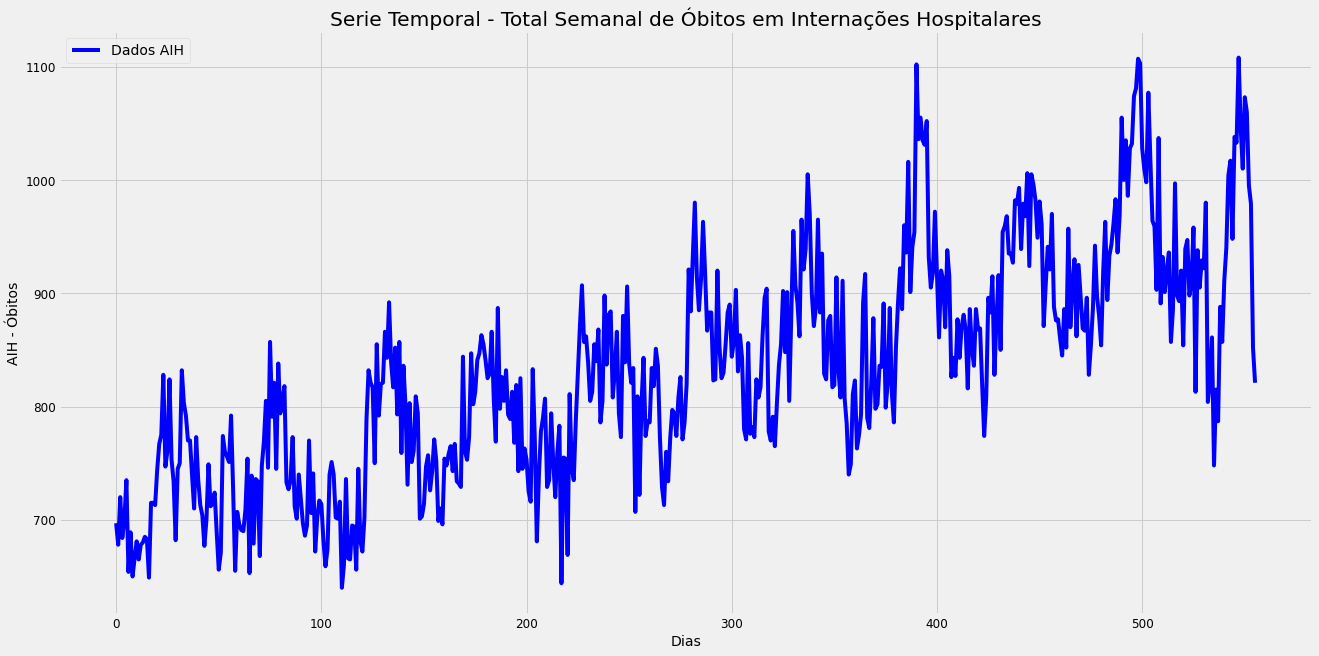

In [11]:
# Plot
plt.title("Serie Temporal - Total Semanal de Óbitos em Internações Hospitalares")
plt.plot(dataset, label = "Dados AIH", color = 'blue')
plt.xlabel("Dias")
plt.ylabel("AIH - Óbitos")
plt.legend(loc = "best")

In [12]:
# Split em treino e teste
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

417 139


In [13]:
# Agora podemos definir uma função para criar um novo conjunto de dados como descrito acima. A função
# recebe 2 argumentos: o conjunto de dados, que é um array NumPy que queremos converter em um dataset e
# look back que é o número de etapas de tempo anteriores para usar como variáveis de entrada para prever
# O próximo período de tempo, neste caso, definido como 1. Esse padrão criará um conjunto de dados onde X é
# o número de passageiros em um determinado momento (t) e Y é o número de passageiros no próximo
# momento (t + 1). 
def create_dataset(dataset, look_back = 1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [14]:
# Reshape em X = t e Y = t + 1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

# Imprimindo dataset de treino
#print(trainX[0:2], trainY[0:2])

# Imprimindo dataset original
#print("\n", dataset[0:3])

In [15]:
# Cria o modelo MLP - RNA - com 1 input, 1 camada oculta com 8 neurônios e uma camada de saída
model = Sequential()

# Camada oculta
model.add(Dense(8, input_dim = look_back, activation = 'relu'))

# Camada de saída
model.add(Dense(1))

# Compilação
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

# Fit do modelo
model.fit(trainX, trainY, epochs = 200, batch_size = 2, verbose = 2)

Epoch 1/200
 - 7s - loss: 464216.9334
Epoch 2/200
 - 1s - loss: 136483.9873
Epoch 3/200
 - 1s - loss: 12809.3924
Epoch 4/200
 - 1s - loss: 2757.4382
Epoch 5/200
 - 1s - loss: 2655.5929
Epoch 6/200
 - 1s - loss: 2658.1453
Epoch 7/200
 - 1s - loss: 2657.5775
Epoch 8/200
 - 1s - loss: 2660.9311
Epoch 9/200
 - 1s - loss: 2668.8491
Epoch 10/200
 - 1s - loss: 2661.3388
Epoch 11/200
 - 1s - loss: 2647.9250
Epoch 12/200
 - 1s - loss: 2680.6932
Epoch 13/200
 - 1s - loss: 2682.1845
Epoch 14/200
 - 1s - loss: 2674.9793
Epoch 15/200
 - 1s - loss: 2686.4508
Epoch 16/200
 - 1s - loss: 2664.8707
Epoch 17/200
 - 1s - loss: 2705.2045
Epoch 18/200
 - 1s - loss: 2687.1313
Epoch 19/200
 - 1s - loss: 2674.6138
Epoch 20/200
 - 1s - loss: 2690.5945
Epoch 21/200
 - 1s - loss: 2687.3423
Epoch 22/200
 - 1s - loss: 2681.7552
Epoch 23/200
 - 1s - loss: 2696.1648
Epoch 24/200
 - 1s - loss: 2695.7359
Epoch 25/200
 - 1s - loss: 2683.4915
Epoch 26/200
 - 1s - loss: 2687.6779
Epoch 27/200
 - 1s - loss: 2662.3449
Epoch

In [16]:
# Estima a performance do modelo
# Tomando a raiz quadrada das estimativas de desempenho, podemos ver que o modelo tem um
# erro médio no conjunto de dados de treinamento e no conjunto de dados de teste.

trainScore = model.evaluate(trainX, trainY, verbose = 0)
print('Score em Treino: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose = 0)
print('Score em Teste: %.4f MSE (%.4f RMSE)' % (testScore, math.sqrt(testScore)))

Score em Treino: 2652.9328 MSE (51.5066 RMSE)
Score em Teste: 3261.4420 MSE (57.1090 RMSE)


In [17]:
# Gera previsões
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [18]:
# Ajusta os dados de treino para o Plot
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [19]:
# Ajusta os dados de teste para o Plot
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

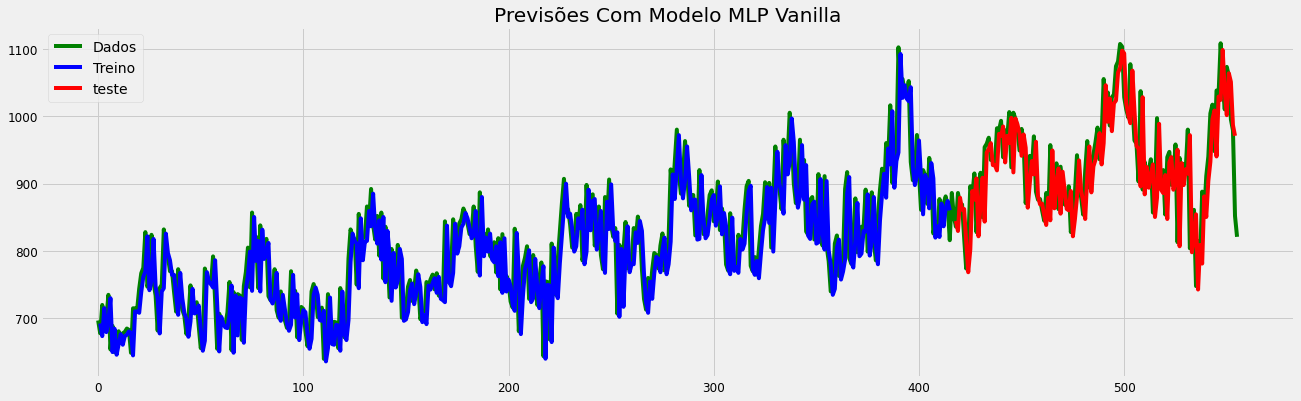

In [20]:
# Plot
plt.figure(figsize = (20, 6))
plt.title('Previsões Com Modelo MLP Vanilla')
plt.plot(dataset, label = 'Dados', color = 'green')
plt.plot(trainPredictPlot, label = 'Treino', color = 'blue')
plt.plot(testPredictPlot, label = 'teste', color = 'Red')
plt.legend(loc = 'upper left')
plt.show()

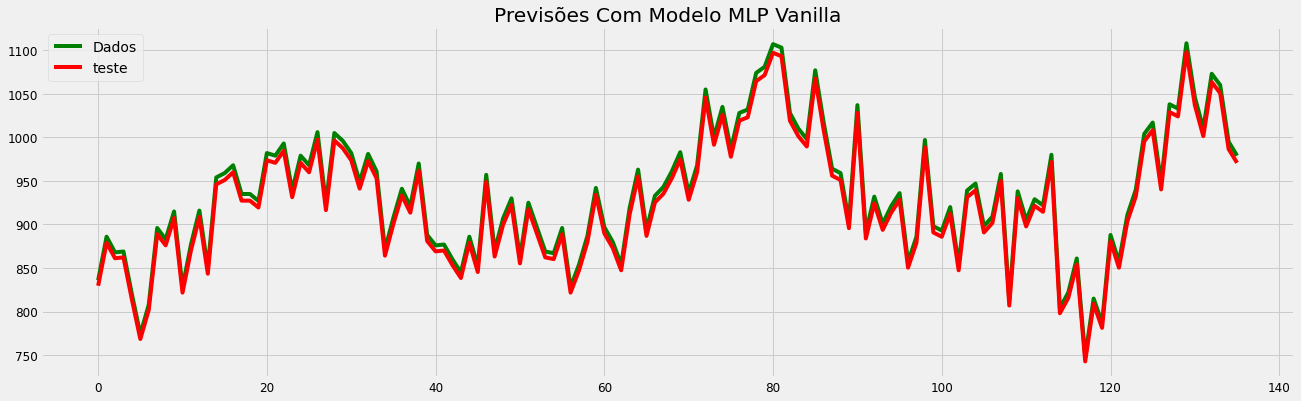

In [21]:
# Plot
plt.figure(figsize = (20, 6))
plt.title('Previsões Com Modelo MLP Vanilla')
plt.plot(dataset[-len(testPredict)-1:-2], label = 'Dados', color = 'green')
plt.plot(testPredictPlot[-len(testPredict-1):], label = 'teste', color = 'Red')
plt.legend(loc = 'upper left')
plt.show()

## Prevendo Séries Temporais com Multilayer Perceptron e Usando Método Window

Podemos também tentar resolver o problema de modo que várias etapas de tempo recente possam ser usadas para a previsão do próximo passo. Isso é chamado de método de janela (Window) e o tamanho da janela é um parâmetro que pode ser sintonizado para cada problema. Por exemplo, dado o tempo atual (t) nós queremos prever o valor na próxima vez na sequência (t + 1), podemos usar o tempo atual (T) bem como os dois tempos anteriores (t-1 e t-2). Quando formulado como um problema de regressão, as variáveis de entrada são t-2, t-1, t e a variável de saída é t + 1.

In [22]:
# Carrega os dados
dataframediario = pandas.read_csv("./data/AIH.csv")
dataframediario['Data'] = pandas.to_datetime(dataframediario.Data, format = '%d/%m/%Y')
dataframediario = dataframediario.set_index('Data')
# Reamostrando os dados para frequência semanal - Usando o valor médio do número de óbitos de pacientes – AIH
dataframesemanal = dataframediario['QT_INTER'].resample('W').sum()
dataframe = dataframesemanal.to_frame()
dataframe.drop(dataframe.head(1).index,inplace=True) # drop first 1 rows
dataframe.drop(dataframe.tail(1).index,inplace=True) # drop last 1 rows

dataset = dataframe.values
dataset = dataset.astype('float32')

In [23]:
# Split em treino e teste
train_size = int(len(dataset) * 0.75)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

417 139


In [24]:
# Reshape em X = t e Y = t + 1
look_back = 2
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [25]:
# Modelo MLP
model = Sequential()
model.add(Dense(8, input_dim = look_back, activation = 'relu'))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)

Epoch 1/200
 - 1s - loss: 1360145.2639
Epoch 2/200
 - 1s - loss: 614209.9293
Epoch 3/200
 - 1s - loss: 289727.0508
Epoch 4/200
 - 1s - loss: 57285.4161
Epoch 5/200
 - 1s - loss: 4842.8653
Epoch 6/200
 - 1s - loss: 2318.4662
Epoch 7/200
 - 1s - loss: 2292.1006
Epoch 8/200
 - 1s - loss: 2296.1970
Epoch 9/200
 - 1s - loss: 2291.7322
Epoch 10/200
 - 1s - loss: 2282.7834
Epoch 11/200
 - 1s - loss: 2296.3565
Epoch 12/200
 - 1s - loss: 2290.9741
Epoch 13/200
 - 1s - loss: 2302.5063
Epoch 14/200
 - 1s - loss: 2317.9550
Epoch 15/200
 - 1s - loss: 2302.9136
Epoch 16/200
 - 1s - loss: 2297.7255
Epoch 17/200
 - 1s - loss: 2315.4705
Epoch 18/200
 - 1s - loss: 2292.0559
Epoch 19/200
 - 1s - loss: 2348.4819
Epoch 20/200
 - 1s - loss: 2321.3941
Epoch 21/200
 - 1s - loss: 2290.0562
Epoch 22/200
 - 1s - loss: 2318.0191
Epoch 23/200
 - 1s - loss: 2321.9036
Epoch 24/200
 - 1s - loss: 2310.7903
Epoch 25/200
 - 1s - loss: 2320.2220
Epoch 26/200
 - 1s - loss: 2294.4984
Epoch 27/200
 - 1s - loss: 2331.6986
Ep

In [26]:
# Performance do Modelo
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Score em Treino: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Score em Teste: %.4f MSE (%.4f RMSE)' % (testScore, math.sqrt(testScore)))

Score em Treino: 2290.1627 MSE (47.8556 RMSE)
Score em Teste: 2638.0469 MSE (51.3619 RMSE)


In [27]:
# Previsões para treino e teste
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [28]:
# Ajustando as previsões de treino para o Plot
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# Ajustando as previsões de teste para o Plot
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

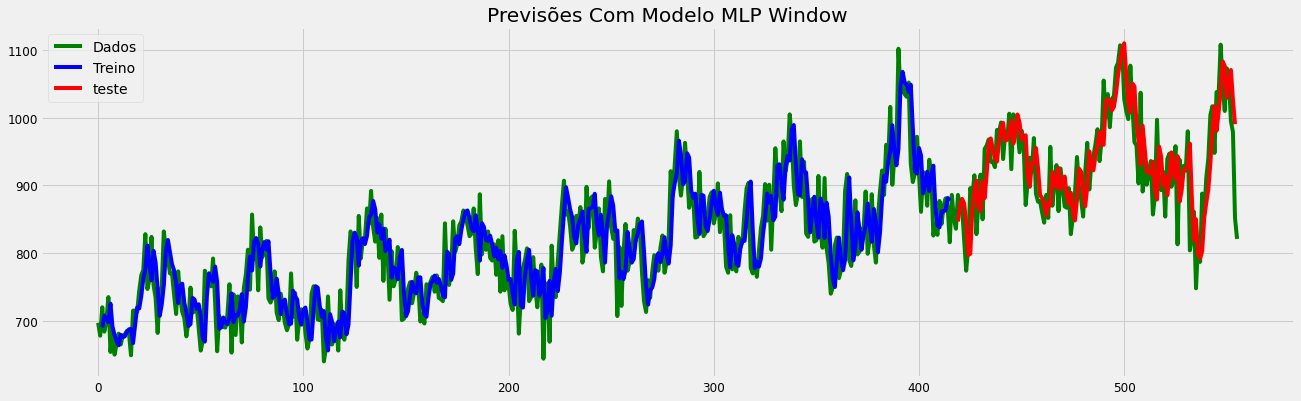

In [29]:
# Plot do baseline e previsões
# Podemos ver que o erro foi reduzido em comparação com o da seção anterior. 
# O tamanho da janela e a arquitetura da rede não foram sintonizados, isso é apenas uma demonstração de como
# enquadrar um problema de previsão em séries temporais. 
# Plot
plt.figure(figsize = (20, 6))
plt.title('Previsões Com Modelo MLP Window')
plt.plot(dataset, label = 'Dados', color = 'green')
plt.plot(trainPredictPlot, label = 'Treino', color = 'blue')
plt.plot(testPredictPlot, label = 'teste', color = 'Red')
plt.legend(loc = 'upper left')
plt.show()

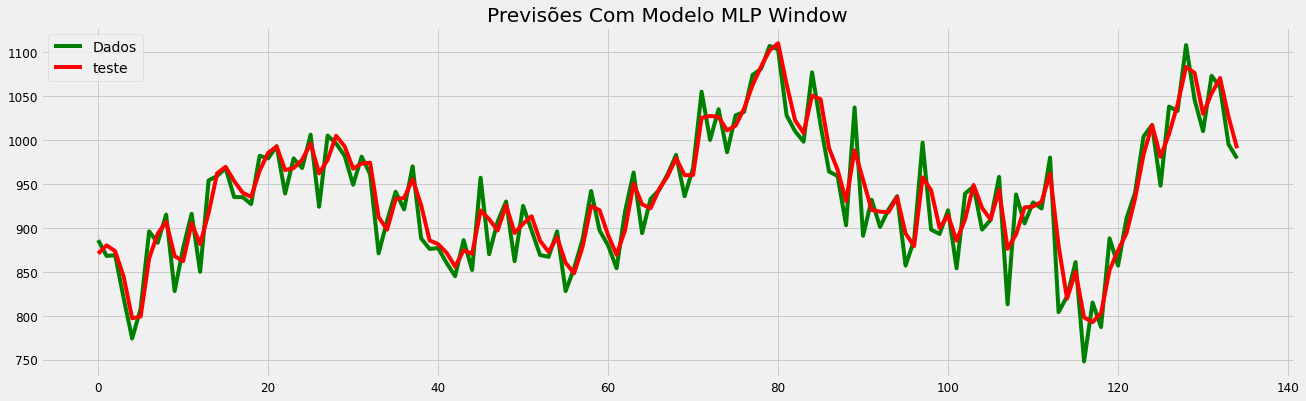

In [30]:
# Plot
plt.figure(figsize = (20, 6))
plt.title('Previsões Com Modelo MLP Window')
plt.plot(test[-len(testPredict)-1:-2], label = 'Dados', color = 'green')
plt.plot(testPredictPlot[-len(testPredict-1):], label = 'teste', color = 'Red')
plt.legend(loc = 'upper left')
plt.show()

Todas as aulas deste curso podem ser encontradas na timeline da Comunidade no portal da DSA: www.datascienceacademy.com.br

# Fim